# ANOVA
- Full form is ‘Analysis of Variance’.
- It is an analysis tool used in statistics.
- It splits an observed variability of a data set into two parts: systematic factors and random factors.
- Analysts use the ANOVA test to determine the influence that independent variables have on the dependent variable in a regression study.
- It is the extension of the t- and z-tests. 


Importing the libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import statsmodels.api as sm
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [3]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [4]:
df_melt.columns = ['index', 'treatments', 'value']

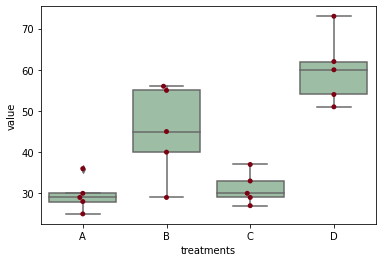

In [5]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [7]:

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output


# Ordinary Least Squares (OLS) model

# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)


# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

IndentationError: unexpected indent (<ipython-input-7-43012818ebee>, line 15)

In [10]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [12]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [19]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [20]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


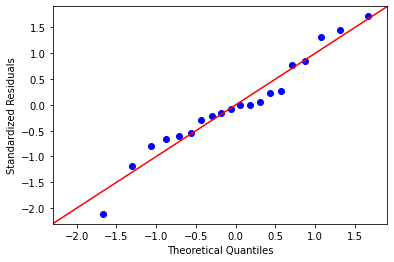

In [22]:
#QQ-plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

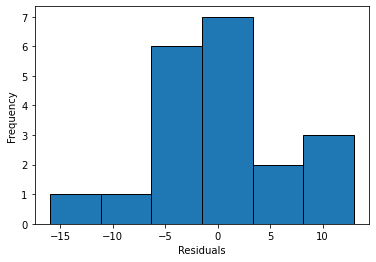

In [23]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [24]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


In [25]:
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


In [26]:
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


In [27]:
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


# KEY TAKEAWAYS
- Analysis of variance, or ANOVA, is a statistical method that separates observed variance data into different components to use for additional tests.
- A one-way ANOVA is used for three or more groups of data, to gain information about the relationship between the dependent and independent variables.
- If no true variance exists between the groups, the ANOVA's F-ratio should equal close to 1.
